In [1]:
import sys
sys.path.append('..')

In [2]:
from PipelineTS.dataset import BuiltInSeriesData
bs = BuiltInSeriesData()

+----+----------------------+----------------------------------------------------------------------+
|    | ds name              | columns                                                              |
+----+----------------------+----------------------------------------------------------------------+
|  0 | AirPassengers        | Month, #Passengers                                                   |
|  1 | ETTh1                | date, HUFL, HULL, MUFL, MULL, LUFL, LULL, OT                         |
|  2 | ETTh2                | date, HUFL, HULL, MUFL, MULL, LUFL, LULL, OT                         |
|  3 | ETTm1                | date, HUFL, HULL, MUFL, MULL, LUFL, LULL, OT                         |
|  4 | ETTm2                | date, HUFL, HULL, MUFL, MULL, LUFL, LULL, OT                         |
|  5 | Electric_Production  | date, value                                                          |
|  6 | M3_monthly_FTS       | series_id, method_id, forecast, horizon, timestamp, origin_ti

In [3]:
init_data = bs['Electric_Production'][['date', 'value']]

<Axes: >

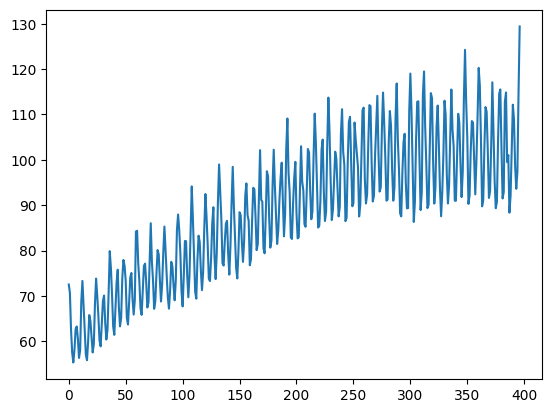

In [4]:
init_data.value.plot()

In [5]:
valid_data = init_data.iloc[-30:, :]
data = init_data.iloc[:-30, :]
data.tail(5)

,date,value
362,2015-03-01,104.4706
363,2015-04-01,89.7461
364,2015-05-01,91.0930
365,2015-06-01,102.6495
366,2015-07-01,111.6354


# PipelineTS

In [6]:
from PipelineTS.pipeline import PipelineTS, PipelineConfigs

In [7]:
# list all models
PipelineTS.list_models()

['prophet',
 'auto_arima',
 'catboost',
 'lightgbm',
 'xgboost',
 'wide_gbrt',
 'd_linear',
 'n_linear',
 'n_beats',
 'n_hits',
 'tcn',
 'tft',
 'gau',
 'stacking_rnn',
 'time2vec',
 'multi_output_model',
 'multi_step_model',
 'transformer',
 'random_forest']

In [8]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

pipeline_configs = PipelineConfigs([
    ('wide_gbrt', {'init_configs': {'quantile': None}}),
    ('multi_output_model', {'init_configs': {'quantile': None, 'verbose': -1}}),
    ('multi_output_model', {
        'init_configs': {'quantile': None, 'estimator': XGBRegressor, 'random_state': 42, 'kwargs':{'verbosity':0}}
        }
    ),
    ('multi_output_model', {
        'init_configs': {'quantile': None, 'estimator': CatBoostRegressor, 'random_state': 42, 'verbose': False}
        }
    ),
])

,model_name,model_name_with_index,model_configs
0,multi_output_model,multi_output_model_1,"{'init_configs': {'quantile': None, 'verbose': -1}, 'fit_configs': {}, 'predict_configs': {}}"
1,multi_output_model,multi_output_model_2,"{'init_configs': {'quantile': None, 'estimator': <class 'xgboost.sklearn.XGBRegressor'>, 'random_state': 42, 'kwargs': {'verbosity': 0}}, 'fit_configs': {}, 'predict_configs': {}}"
2,multi_output_model,multi_output_model_3,"{'init_configs': {'quantile': None, 'estimator': <class 'catboost.core.CatBoostRegressor'>, 'random_state': 42, 'verbose': False}, 'fit_configs': {}, 'predict_configs': {}}"
3,wide_gbrt,wide_gbrt_1,"{'init_configs': {'quantile': None}, 'fit_configs': {}, 'predict_configs': {}}"


In [9]:
from sklearn.metrics import mean_absolute_error
pipeline = PipelineTS(
    time_col='date', 
    target_col='value', 
    lags=30, 
    random_state=42, 
    metric=mean_absolute_error, 
    metric_less_is_better=True,
    configs=pipeline_configs,
    include_init_config_model=False,
    use_standard_scale=False  # False for MinMaxScaler, True for StandardScaler, None means no data be scaled
)

In [ ]:
pipeline.fit(data, valid_data=valid_data)

16:50:00 2023-10-09 - PipelineTS - There are a total of 21 models to be trained.
16:50:00 2023-10-09 - PipelineTS - [model 0] fitting and evaluating auto_arima...
16:50:23 2023-10-09 - PipelineTS - [model 1] fitting and evaluating catboost...
16:50:56 2023-10-09 - PipelineTS - [model 2] fitting and evaluating d_linear...
16:50:58 2023-10-09 - PipelineTS - [model 3] fitting and evaluating gau...
16:51:32 2023-10-09 - PipelineTS - [model 4] fitting and evaluating lightgbm...


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000400 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3090
[LightGBM] [Info] Number of data points in the train set: 308, number of used features: 30
[LightGBM] [Info] Start training from score 0.483728
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

16:51:35 2023-10-09 - PipelineTS - [model 5] fitting and evaluating multi_output_model_1...
16:51:37 2023-10-09 - PipelineTS - [model 6] fitting and evaluating multi_output_model_2...
16:51:39 2023-10-09 - PipelineTS - [model 7] fitting and evaluating multi_output_model_3...


In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(valid_data['value'].iloc[:30].values, pipeline.predict(30)['value'].values)

In [ ]:
pipeline.predict(30)

## quantile prediction

In [ ]:
from sklearn.metrics import mean_absolute_error

from PipelineTS.pipeline import PipelineTS

pipeline2 = PipelineTS(
    time_col='date', 
    target_col='value', 
    lags=30, 
    random_state=42, 
    metric=mean_absolute_error, 
    metric_less_is_better=True,
    configs=pipeline_configs,
    include_init_config_model=False,
    use_standard_scale=False,
    with_quantile_prediction=True   # turn on the quantile prediction switch
)

In [ ]:
pipeline2.fit(data, valid_data)

In [ ]:
pipeline2.predict(30)